In [3]:
from PIL import Image
from tensorflow.keras.datasets import cifar10
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.math import confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import glob,os
 

/home/bahrehvar.majid/.conda/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bahrehvar.majid/.conda/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bahrehvar.majid/.conda/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bahrehvar.majid/.conda/en

In [4]:


(x_train, y_train), (x_test, y_test)=cifar10.load_data()
#(x_train, y_train), (x_test, y_test)=(x_train[:1000,:,:,:], y_train[:1000]), (x_test[:200,:,:,:], y_test[:200])
#filelist=glob.glob('/home/majid/Projects/ML/IoT/bobcatscraper/images/converted/*.jpg')

instances = []

# Load in the images
for filepath in os.listdir("/home/bahrehvar.majid/IoT/LAB2/converted-augmneted"):  
    image=( Image.open('/home/bahrehvar.majid/IoT/LAB2/converted-augmneted/'+filepath))
    data=np.asarray(image)
    if data.shape!=(32,32,3): 
        print(filepath)
        continue
    instances.append(data)

bobcats=np.stack(instances, axis=0)
print(bobcats.shape)
bobcat_group=np.arange(6000).reshape(6000,1); 
bobcat_group.fill(10)
print(bobcat_group  .shape)
x_train=np.concatenate((x_train,bobcats[:5000,:,:,:]),axis=0)
x_test=np.concatenate((x_test,bobcats[5000:,:,:,:]),axis=0)
y_train=np.concatenate((y_train,bobcat_group[:5000]),axis=0)
y_test=np.concatenate((y_test,bobcat_group[5000:]),axis=0)


print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


a= to_categorical(y_train)

print('Shape of y_train after to_categorical is {}'.format(a.shape))
# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,11)
y_test_cat=to_categorical(y_test,11)

print(y_train_cat.shape)
print(y_test_cat.shape)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()








model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history=model.fit(x_train,y_train_cat,epochs=10,validation_data=(x_test,y_test_cat))



(6000, 32, 32, 3)
(6000, 1)
Shape of x_train is (55000, 32, 32, 3)
Shape of x_test is (11000, 32, 32, 3)
Shape of y_train is (55000, 1)
Shape of y_test is (11000, 1)
Shape of y_train after to_categorical is (55000, 11)
(55000, 11)
(11000, 11)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 55000 samples, validate on 11000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
55000/55000 [==============================] - 190s 3ms/sample - loss: 1.6598 - acc: 0.4322 - val_loss: 1.1446 - val_acc: 0.6036
Epoch 2/10
55000/55000 [==============================] - 208s 4ms/sample - loss: 1.1042 - acc: 0.6204 - val_loss: 0.9091 - val_acc: 0.6908
Epoch 3/10
55000/55000 [==============================] - 184s 3ms/sample - loss: 0.8709 - acc: 0.7038 - val_loss: 0.7477 - val_acc: 0.7411
Epoch 4/10
55000/55000 [============================

<AxesSubplot:>

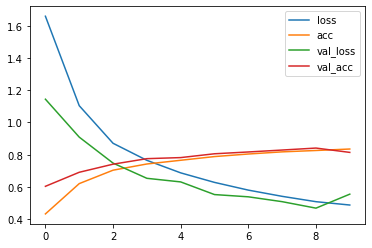

In [5]:
pd.DataFrame(history.history).plot()


In [6]:
evaluation = model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

11000/11000 [==============================] - 13s 1ms/sample - loss: 0.5549 - acc: 0.8143
Test Accuracy: 0.8142727017402649


In [8]:

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.image_size(15,15)
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'image_size'

In [1]:
model.save('/home/majid/model.h5')

NameError: name 'model' is not defined

In [6]:
import keras
model_transfered=keras.models.load_model('/home/ubuntu/model.h5')

In [7]:
model_transfered.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_28 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_29 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [8]:
model_transfered = keras.Model(inputs=model_transfered.input, outputs=model_transfered.layers[-4].output)

In [9]:
model_transfered.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_28 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_29 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                             

In [11]:
for layer in model_transfered.layers:
    layer.trainable = False


In [12]:
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))

new_model = keras.Sequential()
new_model.add(model_transfered) # Add entire model
new_model.add(keras.layers.BatchNormalization())
new_model.add(keras.layers.Dropout(0.5))
new_model.add(keras.layers.Dense(11, activation='softmax'))

In [13]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 128)               551072    
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 11)                1419      
                                                                 
Total params: 553,003
Trainable params: 1,675
Non-trainable params: 551,328
_________________________________________________________________


In [16]:
for index, layer in enumerate(new_model.layers):
    print("Layer: {}, Trainable: {}".format(index, layer.trainable))

Layer: 0, Trainable: False
Layer: 1, Trainable: True
Layer: 2, Trainable: True
Layer: 3, Trainable: True


In [15]:
new_model.layers[0].trainable=False

In [24]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
instances = []
images_path='/home/ubuntu/images/converted'
# Load in the images
for filepath in os.listdir(images_path):  
    image=( Image.open(images_path+"/"+filepath))
    data=np.asarray(image)
    if data.shape!=(32,32,3): 
        print(filepath)
        continue
    instances.append(data)

bobcats=np.stack(instances, axis=0)
print(bobcats.shape)
bobcat_group=np.arange(6000).reshape(6000,1); 
bobcat_group.fill(10)
print(bobcat_group  .shape)
x_train=np.concatenate((x_train,bobcats[:5000,:,:,:]),axis=0)
x_test=np.concatenate((x_test,bobcats[5000:,:,:,:]),axis=0)
y_train=np.concatenate((y_train,bobcat_group[:5000]),axis=0)
y_test=np.concatenate((y_test,bobcat_group[5000:]),axis=0)


print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


a= to_categorical(y_train)

print('Shape of y_train after to_categorical is {}'.format(a.shape))
# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,11)
y_test_cat=to_categorical(y_test,11)

print(y_train_cat.shape)
print(y_test_cat.shape)






(6000, 32, 32, 3)
(6000, 1)
Shape of x_train is (55000, 32, 32, 3)
Shape of x_test is (11000, 32, 32, 3)
Shape of y_train is (55000, 1)
Shape of y_test is (11000, 1)
Shape of y_train after to_categorical is (55000, 11)
(55000, 11)
(11000, 11)


In [25]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1719/1719 [==============================] - 30s 17ms/step - loss: 0.5711 - accuracy: 0.8089 - val_loss: 0.5194 - val_accuracy: 0.8320
Epoch 2/50
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3558 - accuracy: 0.8740 - val_loss: 0.5218 - val_accuracy: 0.8318
Epoch 3/50
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3461 - accuracy: 0.8748 - val_loss: 0.5254 - val_accuracy: 0.8316
Epoch 4/50
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3414 - accuracy: 0.8778 - val_loss: 0.5295 - val_accuracy: 0.8321
Epoch 5/50
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3345 - accuracy: 0.8799 - val_loss: 0.5308 - val_accuracy: 0.8310
Epoch 6/50
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3401 - accuracy: 0.8773 - val_loss: 0.5267 - val_accuracy: 0.8324
Epoch 7/50
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3345 - accuracy: 0.8792 - val_loss: 0.5294 -

<AxesSubplot:>

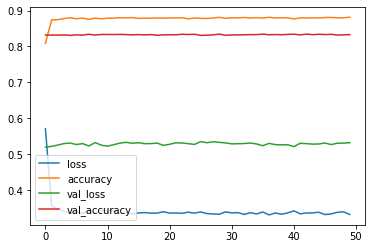

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

344/344 [==============================] - 4s 12ms/step - loss: 0.5320 - accuracy: 0.8331
Test Accuracy: 0.8330909013748169


In [ ]:

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
figure(figsize=(8, 6), dpi=80)
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)